In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import statsmodels.api as sm

In [5]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
import math

n = len(df['TV'])
bins = int(math.sqrt(n))
print(bins)

14


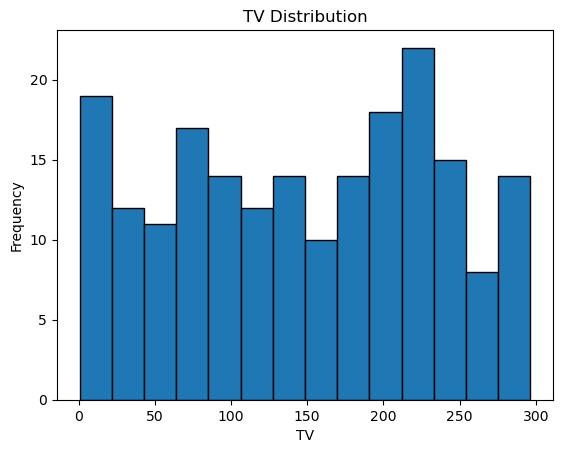

In [22]:
import matplotlib.pyplot as plt

plt.hist(df['TV'], bins=14, edgecolor='black')
plt.title('TV Distribution')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()


In [18]:
import math

n = len(df['Sales'])
bins = int(math.sqrt(n))
print(bins)

14


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


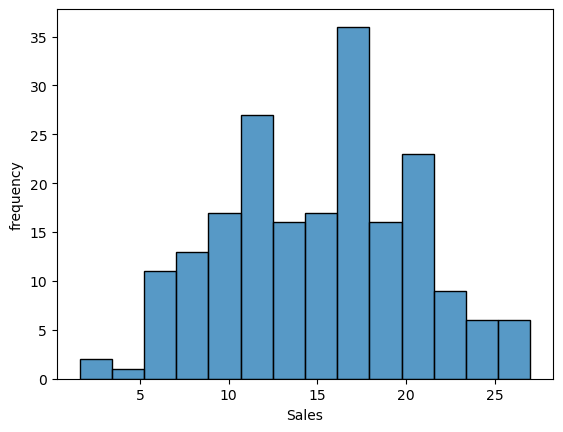

In [25]:
sns.histplot(df['Sales'], bins=14, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel("frequency")
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_s = df.copy()
cols_to_scale = ['TV', 'Radio', 'Newspaper']

df_s[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_s

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


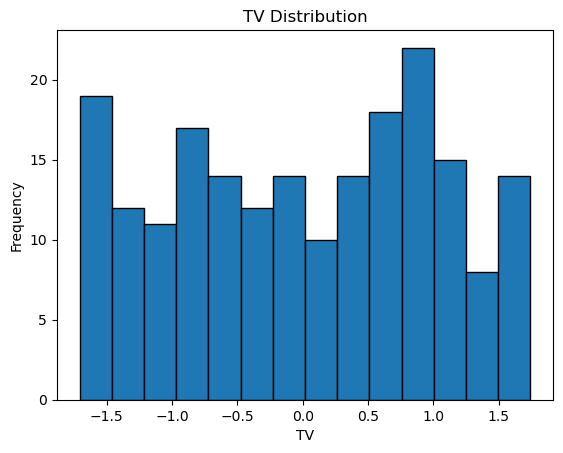

In [32]:
import matplotlib.pyplot as plt

plt.hist(df_s['TV'], bins=14, edgecolor='black')
plt.title('TV Distribution')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()


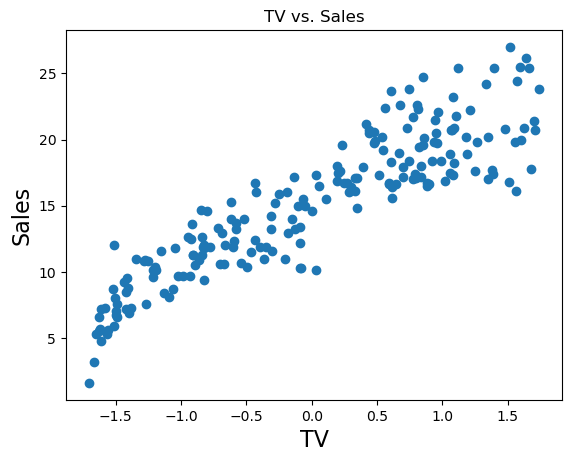

In [35]:

plt.scatter(df_s['TV'],y)
plt.xlabel('TV', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.title('TV vs. Sales')
plt.show()

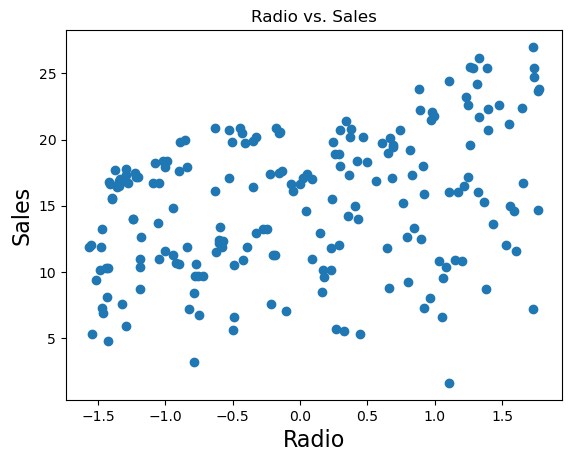

In [36]:
plt.scatter(df_s['Radio'],y)
plt.xlabel('Radio', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.title('Radio vs. Sales')
plt.show()

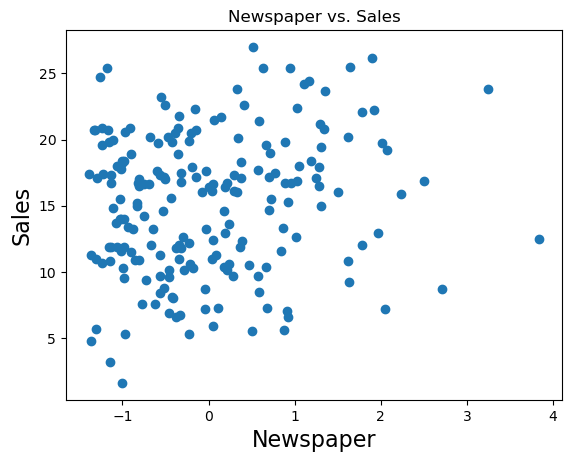

In [37]:
plt.scatter(df_s['Newspaper'],y)
plt.xlabel('Newspaper', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.title('Newspaper vs. Sales')
plt.show()

In [ ]:
x = df_s[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [38]:
x0 = sm.add_constant(x)
result = sm.OLS(y, x0).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           8.13e-99
Time:                        10:30:19   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.000      14.899      15.362
TV             4.6627      0.118     39.592      0.000       4.430       4.895
Radio          1.5847      0.126     12.604      0.000       1.337       1.833
Newspaper      0.0073      0.126      0.058      0.954      -0.241       0.255
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         1.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df_f = df_s.drop(columns = ['Newspaper'])

In [41]:
df_f

,TV,Radio,Sales
0,0.969852,0.981522,22.1
1,-1.197376,1.082808,10.4
2,-1.516155,1.528463,12.0
3,0.052050,1.217855,16.5
4,0.394182,-0.841614,17.9
...,...,...,...
195,-1.270941,-1.321031,7.6
196,-0.617035,-1.240003,14.0
197,0.349810,-0.942899,14.8
198,1.594565,1.265121,25.5


In [43]:
X = df[['TV', 'Radio']]
y = df['Sales']

x0 = sm.add_constant(X)

result2 = sm.OLS(y, x0).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          2.39e-100
Time:                        10:37:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

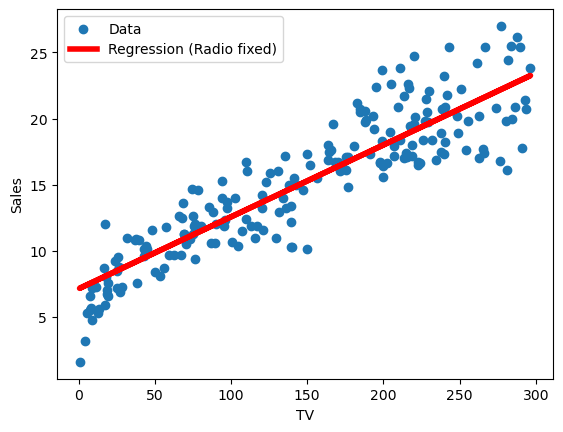

In [45]:
import numpy as np

x1 = df['TV']
x2_mean = df['Radio'].mean()
yhat = 0.0544 * x1 + 0.1072 * x2_mean + 4.6309

plt.scatter(x1, y, label='Data')
plt.plot(x1, yhat, lw=4, c='red', label='Regression (Radio fixed)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()


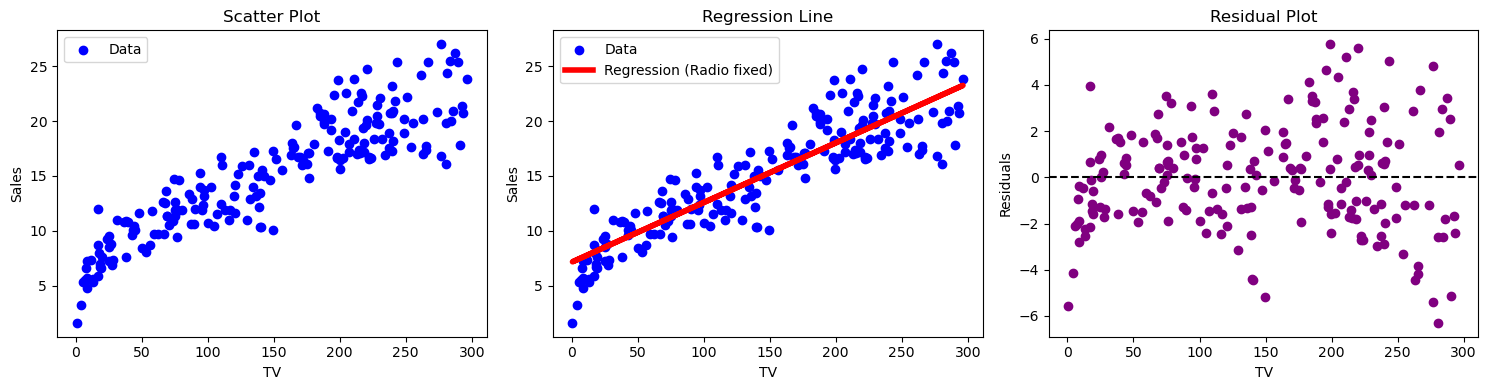

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x1 = df['TV']
y = df['Sales']

# Regression parameters
x2_mean = df['Radio'].mean()
yhat = 0.0544 * x1 + 0.1072 * x2_mean + 4.6309

# Create a figure with 3 plots side-by-side
plt.figure(figsize=(15, 4))

# Plot 1: Original data
plt.subplot(1, 3, 1)
plt.scatter(x1, y, label='Data', color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot')
plt.legend()

# Plot 2: Regression line (Radio fixed at mean)
plt.subplot(1, 3, 2)
plt.scatter(x1, y, label='Data', color='blue')
plt.plot(x1, yhat, lw=4, c='red', label='Regression (Radio fixed)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression Line')
plt.legend()

# Plot 3: Residuals
residuals = y - yhat
plt.subplot(1, 3, 3)
plt.scatter(x1, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
